Importando  biblioteca Pandas:

In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline

Checando como os dados estão orgazizados:

In [2]:
dados = pd.read_csv('./fipe_2022.csv')
dados.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl,age_years
0,2022,January,038001-6,vwmrywl5qs,Acura,NSX 3.0,Gasoline,manual,3.0,1995,43779.0,28
1,2022,January,038001-6,t9mt723qhz,Acura,NSX 3.0,Gasoline,manual,3.0,1994,42244.0,29
2,2022,January,038001-6,tr5wv4z21g,Acura,NSX 3.0,Gasoline,manual,3.0,1993,40841.0,30
3,2022,January,038001-6,s2xxsjz3mt,Acura,NSX 3.0,Gasoline,manual,3.0,1992,39028.0,31
4,2022,January,038001-6,rtm9gj7zk8,Acura,NSX 3.0,Gasoline,manual,3.0,1991,35678.0,32


Visualizando o somatório das vendas por marca:

In [16]:
#Agrupando por marca:
por_marca = dados.loc[0:,['brand','avg_price_brl']].groupby('brand')
#Fazendo o somatório:
VendasPorMarca = por_marca.sum().sort_values('avg_price_brl')
VendasPorMarca.mean()

avg_price_brl    4.120798e+08
dtype: float64

In [18]:
VendasAcimaDaMedia = VendasPorMarca[VendasPorMarca['avg_price_brl']>4.120798e+08]
VendasAcimaDaMedia

,avg_price_brl
brand,
Nissan,4.597770e+08
Peugeot,4.621956e+08
Hyundai,4.907351e+08
Jeep,5.053497e+08
Maserati,6.940464e+08
Renault,7.232481e+08
Volvo,7.304544e+08
Jaguar,7.619095e+08
Mitsubishi,8.734747e+08


ValueError: Incorrect use of keyword argument 'rotation'. Keyword arguments other than 'minor' modify the text labels and can only be used if 'labels' are passed as well.

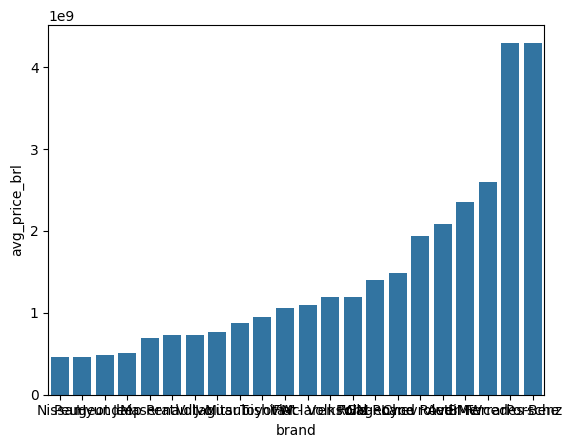

In [20]:
plot1 = sns.barplot(x='brand',y='avg_price_brl',data=VendasAcimaDaMedia)
plot1.set_xticks(ticks=None,rotation=45)

Contando a quantidade de vendas por modelo (Porsche):

In [ ]:
#Selecionando as linhas em quê a marca seja Porsche:
Porsche = dados[dados['brand']=='Porsche']
#Agrupando por modelo e renomeando uma coluna para contabilizar as vendas:
PorschePorModelo = Porsche.loc[0:,['model','fuel']].rename(columns={'fuel':'vendas'}).groupby('model')
#Contando e ordenando por vendas:
Vendas = PorschePorModelo.count().sort_values('vendas')
Vendas

In [ ]:
sns.catplot(data=Vendas,x='vendas',y='model',kind='point')

In [ ]:
sns.boxplot(x='model',y='vendas',data=Vendas[145:])

# Lista de gráficos que deveremos fazer:

<p>1° - Gráficos mostrando o lucro anual das marcas citadas (Em real).</p>
<p>2° - Gráfico de vendas dos carros da marca com maior lucro (Em quantidade e em real).</p>
<p>3° - Gráfico exibindo a quantidade de vendas por mês. (Média de todas as marcas)</p>
<p>4° - Gráfico exibindo o valor de vendas por mês (Média de todas as marcas, em real.).</p>

# Descrição do CSV:

Esse é um *dataset* que contem dados relacionados a vendas de carros no Brasil no ano de 2022. Contendo como dados: O ano de referência (2022), o mês de referência, o código fipe, o código de autencidade, a marca do carro, o modelo, o combustível utilizado, o tipo de câmbio, o tipo de motor, o ano do carro, o preço e a idade.

Este *dataset* foi obtido através do site <a href='https://www.kaggle.com/datasets'>Kaggle</a> que disponibiliza *datasets* gratuitos para download.